Import libraries

In [1]:
import pandas as pd
from utils import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data exploration

In [2]:
data_loader = DataLoader("healthcare-dataset-stroke-data.csv")
data_loader.load_dataset()
data_raw = data_loader.data
data = data_raw.copy()

print(data.shape)
data.head() 

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.drop(columns='id',inplace=True) # We drop the id column as it is not relevant for the exploration
data.info() # We notice missing values present in the BMI column  only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


col:  gender


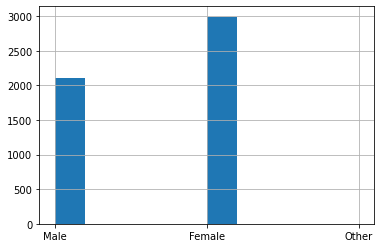

col:  age


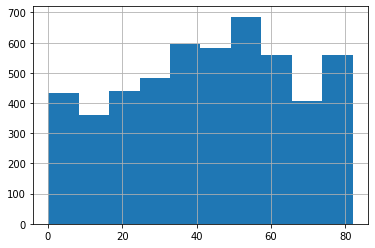

col:  hypertension


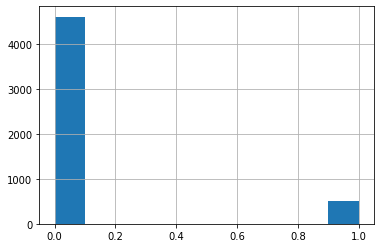

col:  heart_disease


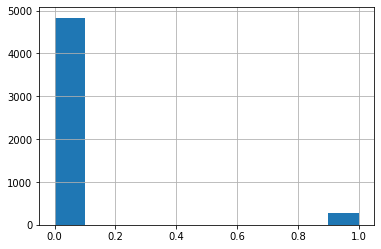

col:  ever_married


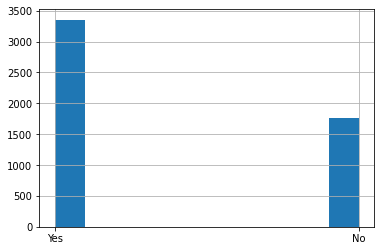

col:  work_type


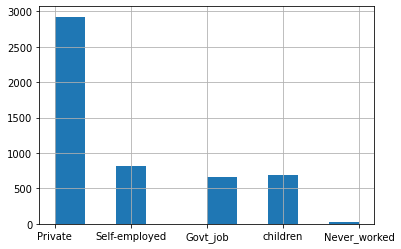

col:  Residence_type


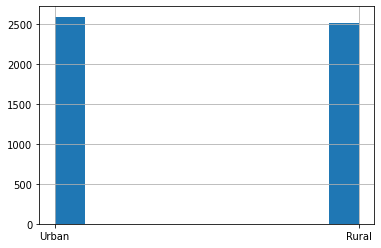

col:  avg_glucose_level


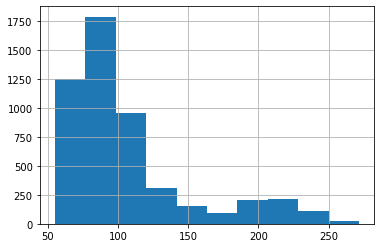

col:  bmi


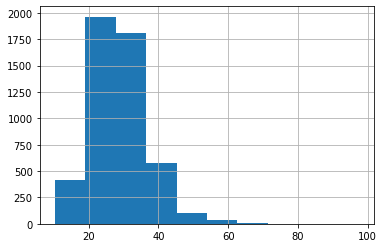

col:  smoking_status


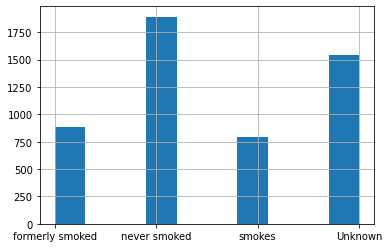

col:  stroke


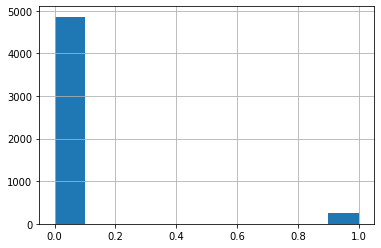

In [4]:
# Histogram for all columns
columns = data.columns
for col in columns:
    print("col: ", col)
    data[col].hist()
    plt.show()

We see from the stroke column that the data is higly imbalanced. We have much more datapoints from participants without strokes. We will account for this in the preprocessing. 

We also see that hypertension, heart_disease, and stroke are highly imbalanced. 


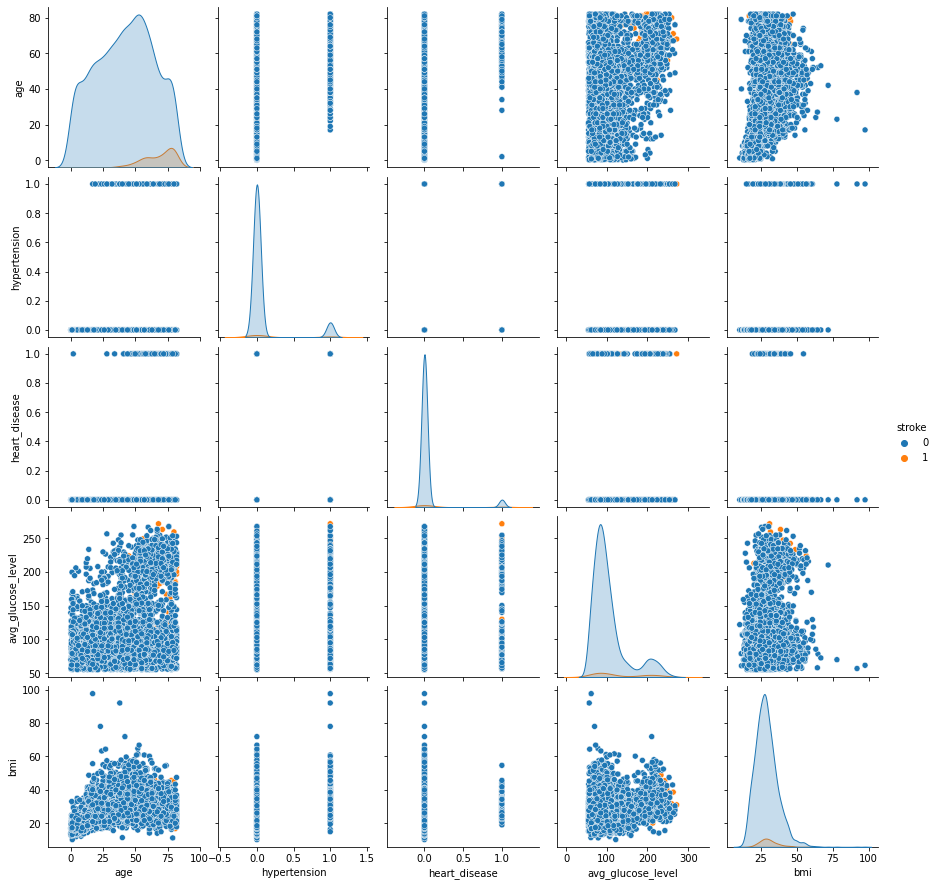

In [5]:
from seaborn import pairplot

# Numerical variables
pairplot(data, hue = 'stroke')


We find that the older you are the more strokes. The rest is hard to see due to the imbalance. 

The distribution of age looks relatively normal. 
The distributions of avg_glucose_level and bmi are skewed very severely towards the right.

In [6]:
# For categorical variable smoking
pd.crosstab(data['smoking_status'], data['stroke'], normalize = 'index')

stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


In [7]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Of the people who smoke 5.3% have had a stroke wheras for those who do not smoke, it is only 4.8%
Small differences. We also notice the unkwon option which have many entries so we cannot just remove these. 

In [8]:
pd.crosstab(data['work_type'], data['stroke'], normalize = 'index')

stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949060,0.050940
Self-employed,0.920635,0.079365
children,0.997089,0.002911


Again, small differences where it seem to be that self-employed have the highest rate of 7.9% strokes compared to provate 5.1% and government job 5%

In [9]:
pd.crosstab(data['Residence_type'], data['stroke'], normalize = 'index')

stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003


Slightly higher percentage for Urban 5.2% that for Rural 4.5% residences. 

We investigate the BMI column that contained missing values 

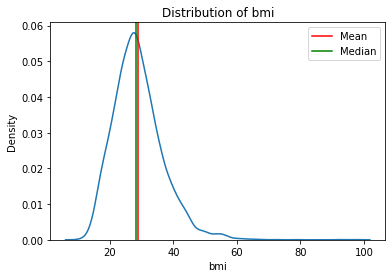

In [10]:
sns.kdeplot(data=data, x='bmi') 
plt.axvline(np.mean(data['bmi']), 0,1.6, color = "red", label = "Mean")
plt.axvline(np.nanmedian(data['bmi']), 0,1.6, color = "green", label = "Median")
plt.legend()
plt.title("Distribution of bmi")
plt.show()

The distribution is skewed. We look into it with a boxlpot  

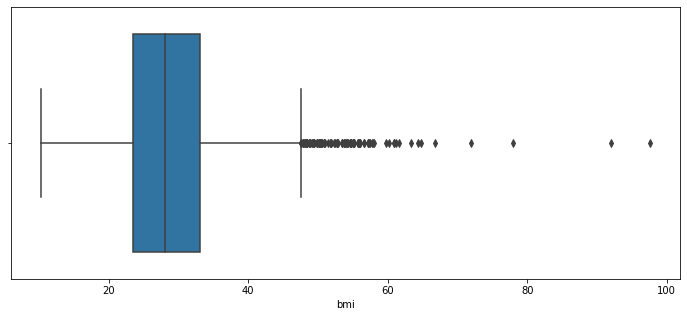

In [11]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x="bmi")
plt.show()

We find a lot of outlier on the right. As the distribution plot showed the median was slightly closer to the highest point of the distribution, we choose that for imputing missing values for the preprocessing. 

We look into the unique variable entries

In [12]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [14]:
len(data[data.gender == 'Other'])
# Only one in the other category. Could be removed in preprocessing

1

We check for multicollinearity 

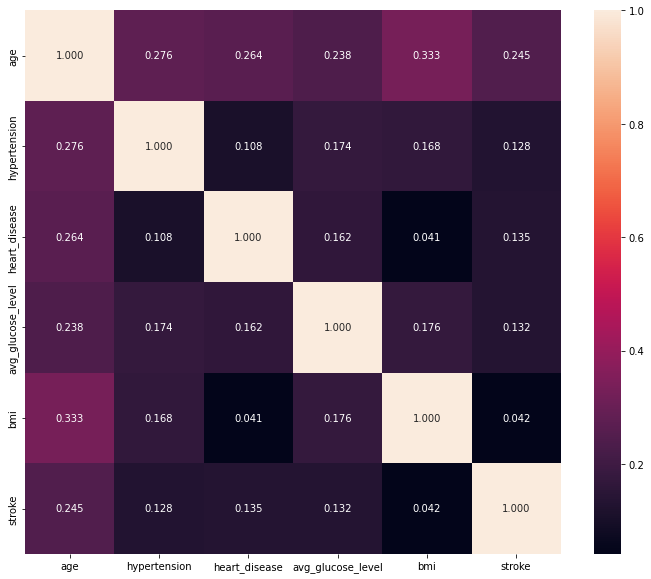

In [16]:
plt.figure(figsize=(12, 10))
g = sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()

None of the variables are highly correlated and therefore no problem with multicollinearity.
BMI and age has the highet correlation. All are positively correlated. 